# Tutorial 5

Let us consider the following Convection-Diffusion problem in *1d*

$$
  \alpha \partial_x u - \beta  \partial_{xx} u = f(x),  \quad \Omega = ]0, L[ 
  \\
  u(0) = u(L) = 0 
$$

The weak formulation is

$$
  \int_{\Omega} \alpha v u_x + \beta v_x u_x ~d\Omega = \int_{\Omega} f v ~d\Omega
$$

We now introduce the Péclet number 

$$
  P_e = \frac{\alpha h}{2 \beta}
$$

where $h$ denotes the mesh step.

next, we consider $L=1$ and $f(x) = 1$ for which the analytical solution writes

$$
  u(x) = \frac{1}{\alpha} \left( x - \frac{1-e^{\gamma x}}{1-e^{\gamma}}  \right)
$$

with $\gamma = \frac{\alpha}{\beta}$

For our tests, we will be using $\alpha = 1$ and $P_e \in \{ 0.1, 0.25, 0.9, 5 \}$ and $h=0.01$ which gives $\beta \in \{ 0.05, 0.02, \frac{1}{180}, 0.001 \}$ and  $\gamma \in \{ 20, 50, 180, 1000 \}$.

Let's first start with the usual imports and define the **construct_form** function as in the previous tutorial


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from vale import construct_model
import numpy as np
import os
import clapp.common.utils      as clapp_utils

# ... initializing Clapp
clapp_utils.initialize()
# ...

# ...
def construct_form(filename, mapping, discretization):
    # ... clean input directory. needed for Fortran
    cmd = "rm -rf input"
    os.system(cmd)
    # ...

    # ... creates discretization parameters
    from clapp.disco.parameters.bspline import BSpline

    bspline_params = BSpline(discretization["n_elements"], \
                             discretization["degrees"], \
                             bc_min=[0,0], \
                             bc_max=[0,0])
    # ...

    # ... create a context from discretization
    from clapp.fema.context        import Context

    context = Context(dirname="input", \
                      discretization_params=bspline_params)
    # ...

    # ...
    pde = construct_model(filename, backend="clapp", \
                          context=context, mapping=mapping)
    # ...

    # ... accessing the pde declarations
    V           = pde["V"]
    form_a      = pde["a"]
    # ...
    
    # ... clean input directory
    cmd = "rm -rf input"
    os.system(cmd)
    # ...
    
    return form_a
# ...

The following function allows to construct and plot the glt symbol, given a bilinear form

In [2]:
def run(form, constants, plot_matrix=True, **settings):
    # ... gets the assembler associated to the weak formulation.
    assembler = form.assembler
    # ...

    # ... tells the assembler to use the provided values of constants
    assembler.set_constants(constants)
    # ...

    # ... assembling the linear system
    if plot_matrix:
        assembler.assemble()
    # ...
    
    # ... compute the glt symbol and evaluate it
    from glt.expression import glt_symbol_from_weak_formulation
    
    expr = glt_symbol_from_weak_formulation(form, \
                                            verbose=False, evaluate=True, \
                                            discretization=discretization, \
                                            user_constants=constants)
    # ...
    
    # ...
    from glt.expression import glt_plot_eigenvalues
    
    matrix = None
    if plot_matrix:
        matrix = form.matrix
        
    glt_plot_eigenvalues(expr, discretization, \
                         mapping=mapping, \
                         matrix=matrix, tolerance=1.-13, **settings)

    if plot_matrix:
        plt.legend(loc=2);
    # ...  
    
    return expr

We use **CAID** to create the geometry, then convert it to the *mapping* object from *CLAPP*

In [3]:
# ... creates a unit line geometry using CAID
from caid.cad_geometry import line
geometry = line()
# ...
    
# ...
from clapp.spl.mapping import Mapping
mapping = Mapping(geometry=geometry)
# ...

## Linear Splines

We specify the discretization, by giving the number of elements and spline degrees in every direction

In [65]:
# ... define a discretization
discretization = {"n_elements": [100], "degrees": [1]}
# ...

We use our user-friendly **construct_form** function to create and assemble the linear system

In [66]:
# ... discretize the bilinear form
form = construct_form(filename="../../glt/tests/1d/inputs/convection_diffusion.vl", \
                      mapping=mapping, \
                      discretization=discretization)
# ...

Let's now plot the eigenvalues of the linear system together with their approximation, using a uniform sampling of the symbol for a Péclet number $P_e = 0.1$

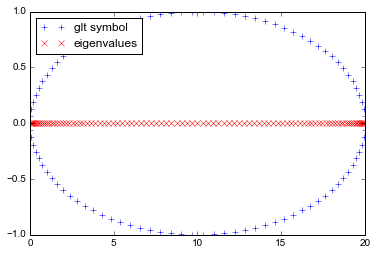

In [67]:
expr = run(form, constants = {"alpha": 1., "beta": 0.05})

Let's now consider a Péclet number $P_e = 0.25$

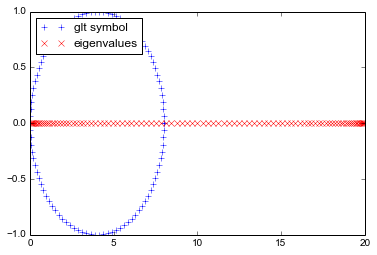

In [68]:
expr = run(form, constants = {"alpha": 1., "beta": 0.02})

Let's now consider a Péclet number $P_e = 0.9$

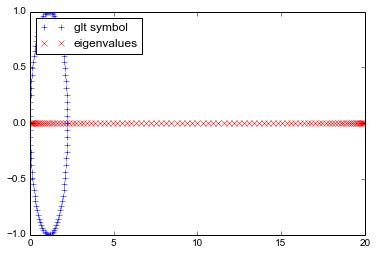

In [69]:
expr = run(form, constants = {"alpha": 1., "beta": 1./180})

Let's now consider a Péclet number $P_e = 5$

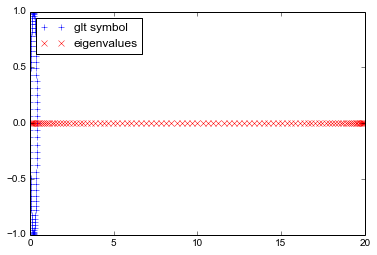

In [70]:
expr = run(form, constants = {"alpha": 1., "beta": 0.001})

## Quadratic Splines

We specify the discretization, by giving the number of elements and spline degrees in every direction

In [40]:
# ... define a discretization
discretization = {"n_elements": [100], "degrees": [2]}
# ...

We use our user-friendly **construct_form** function to create and assemble the linear system

In [41]:
# ... discretize the bilinear form
form = construct_form(filename="../../glt/tests/1d/inputs/convection_diffusion.vl", \
                      mapping=mapping, \
                      discretization=discretization)
# ...

Let's now plot the eigenvalues of the linear system together with their approximation, using a uniform sampling of the symbol for a Péclet number $P_e = 0.1$

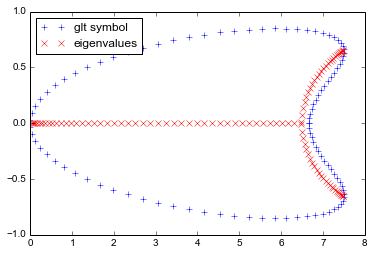

In [42]:
expr = run(form, constants = {"alpha": 1., "beta": 0.05})

Let's now consider a Péclet number $P_e = 0.25$

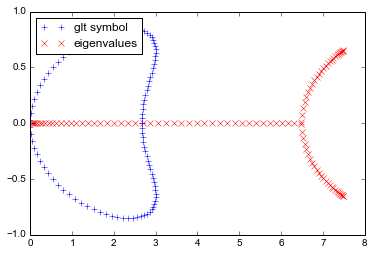

In [43]:
expr = run(form, constants = {"alpha": 1., "beta": 0.02})

Let's now consider a Péclet number $P_e = 0.9$

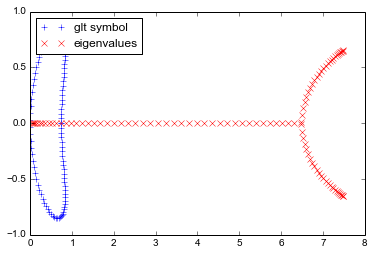

In [44]:
expr = run(form, constants = {"alpha": 1., "beta": 1./180})

Let's now consider a Péclet number $P_e = 5$

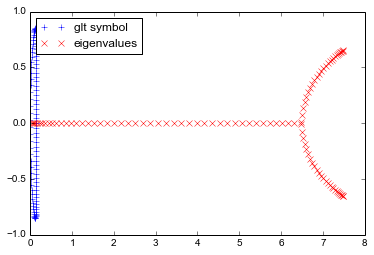

In [45]:
expr = run(form, constants = {"alpha": 1., "beta": 0.001})

## Cubic Splines

We specify the discretization, by giving the number of elements and spline degrees in every direction

In [46]:
# ... define a discretization
discretization = {"n_elements": [100], "degrees": [3]}
# ...

We use our user-friendly **construct_form** function to create and assemble the linear system

In [47]:
# ... discretize the bilinear form
form = construct_form(filename="../../glt/tests/1d/inputs/convection_diffusion.vl", \
                      mapping=mapping, \
                      discretization=discretization)
# ...

Let's now plot the eigenvalues of the linear system together with their approximation, using a uniform sampling of the symbol for a Péclet number $P_e = 0.1$

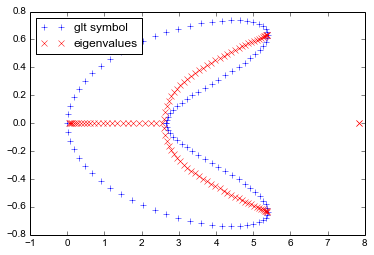

In [48]:
expr = run(form, constants = {"alpha": 1., "beta": 0.05})

Let's now consider a Péclet number $P_e = 0.25$

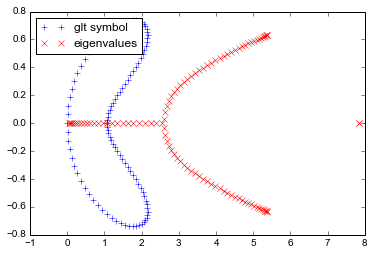

In [21]:
expr = run(form, constants = {"alpha": 1., "beta": 0.02})

Let's now consider a Péclet number $P_e = 0.9$

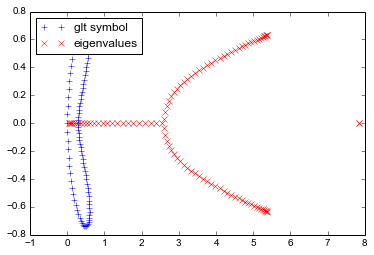

In [22]:
expr = run(form, constants = {"alpha": 1., "beta": 1./180})

Let's now consider a Péclet number $P_e = 5$

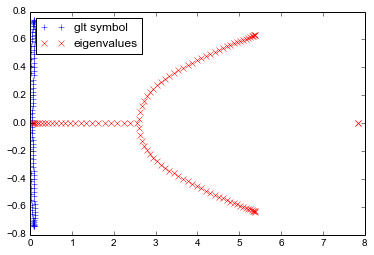

In [23]:
expr = run(form, constants = {"alpha": 1., "beta": 0.001})

## Quartic Splines

We specify the discretization, by giving the number of elements and spline degrees in every direction

In [25]:
# ... define a discretization
discretization = {"n_elements": [100], "degrees": [4]}
# ...

We use our user-friendly **construct_form** function to create and assemble the linear system

In [26]:
# ... discretize the bilinear form
form = construct_form(filename="../../glt/tests/1d/inputs/convection_diffusion.vl", \
                      mapping=mapping, \
                      discretization=discretization)
# ...

Let's now plot the eigenvalues of the linear system together with their approximation, using a uniform sampling of the symbol for a Péclet number $P_e = 0.1$

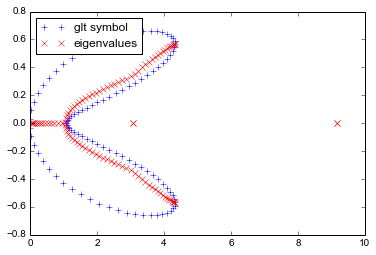

In [27]:
expr = run(form, constants = {"alpha": 1., "beta": 0.05})

Let's now consider a Péclet number $P_e = 0.25$

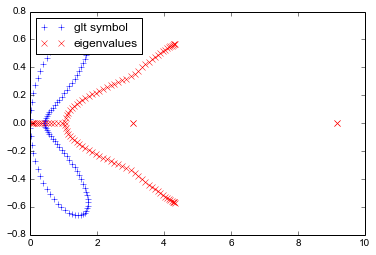

In [28]:
expr = run(form, constants = {"alpha": 1., "beta": 0.02})

Let's now consider a Péclet number $P_e = 0.9$

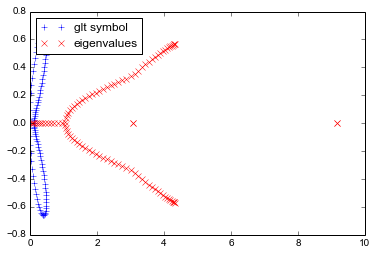

In [29]:
expr = run(form, constants = {"alpha": 1., "beta": 1./180})

Let's now consider a Péclet number $P_e = 5$

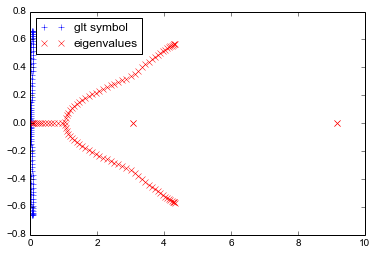

In [30]:
expr = run(form, constants = {"alpha": 1., "beta": 0.001})

## Quintic Splines

We specify the discretization, by giving the number of elements and spline degrees in every direction

In [31]:
# ... define a discretization
discretization = {"n_elements": [100], "degrees": [5]}
# ...

We use our user-friendly **construct_form** function to create and assemble the linear system

In [32]:
# ... discretize the bilinear form
form = construct_form(filename="../../glt/tests/1d/inputs/convection_diffusion.vl", \
                      mapping=mapping, \
                      discretization=discretization)
# ...

Let's now plot the eigenvalues of the linear system together with their approximation, using a uniform sampling of the symbol for a Péclet number $P_e = 0.1$

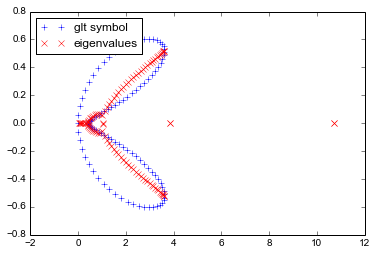

In [33]:
expr = run(form, constants = {"alpha": 1., "beta": 0.05})

Let's now consider a Péclet number $P_e = 0.25$

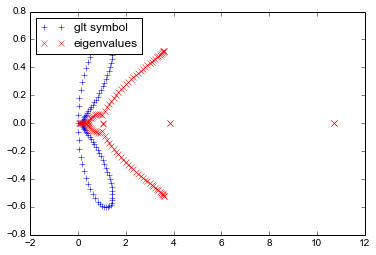

In [34]:
expr = run(form, constants = {"alpha": 1., "beta": 0.02})

Let's now consider a Péclet number $P_e = 0.9$

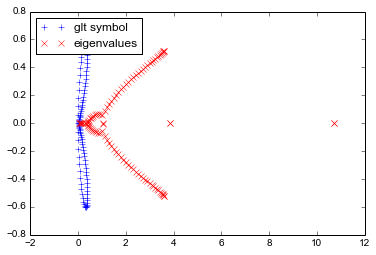

In [35]:
expr = run(form, constants = {"alpha": 1., "beta": 1./180})

Let's now consider a Péclet number $P_e = 5$

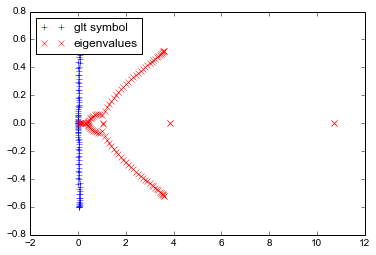

In [36]:
expr = run(form, constants = {"alpha": 1., "beta": 0.001})

## Dependency with respect to the spline degree

In this section, we will show how the glt symbol depends on the spline degree. 

We first consider a Péclet number $P_e = 0.1$ and plot approximation of the eigenvalues for different spline degrees

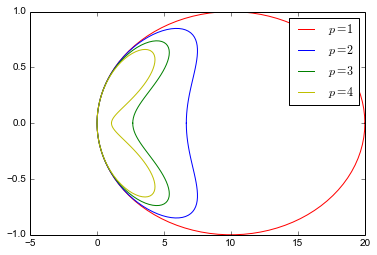

In [14]:
colors = ["r", "b", "g", "y", "m", "k", "c"]
for i,p in enumerate(range(1, 5)):
    discretization = {"n_elements": [100], "degrees": [p]}

    form = construct_form(filename="../../glt/tests/1d/inputs/convection_diffusion.vl", \
                          mapping=mapping, \
                          discretization=discretization)

    expr = run(form, \
               constants = {"alpha": 1., "beta": 0.05}, \
               plot_matrix=False, \
               label="$p=" + str(p) + "$", \
               properties="-"+colors[i])
    
plt.legend(loc=1);

In [ ]:
# ... Finalizing Clapp
clapp_utils.finalize()
# ...